## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def random_frequency(n, p):
    m = 0

    for _ in range(n+1):
        u = random.uniform(0,1)
        
        if u < p:
            m+=1
    random_frequency = m / n

    return random_frequency


def sum_frequencies(n1, n2, n3, p):
    rf1 = random_frequency(n1,p)
    rf2 = random_frequency(n2,p)
    rf3 = random_frequency(n3,p)

    sum_random_freq = rf1 + rf2 + rf3 
    
    return sum_random_freq

In [2]:

# Function to calculate mean for normal distribution
def mean_theory(rf1, rf2, rf3):
    math_exp = 0.5*(rf1 + rf2+ rf3)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(rf1, rf2, rf3):
    variance_value = (1/12)*((rf1**2) + (rf2**2) + (rf3**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [3]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [4]:
def simulations(rf1, rf2, rf3, random_frequencies):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(rf1, rf2, rf3)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_frequencies)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_frequencies)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(rf1, rf2, rf3)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_frequencies, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [5]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random frequencies: {random_frequencies}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random_freq is {max(random_frequencies)}")
    print(f"Min_Random_freq is {min(random_frequencies)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [11]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_value = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_value, y_value, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [7]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [1.52, 1.455, 1.33, 1.46, 1.545, 1.4649999999999999, 1.555, 1.5, 1.4, 1.55]
Max_Random_freq is 1.555
Min_Random_freq is 1.33

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.478

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.005206666666666631

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.07215723571941092

Relative Error for Mathematical Expectation: 1.4666666666666681%
Relative Error for Standard Deviation: 85.56855285611782%
Relative Error for Variance: 97.91733333333335%



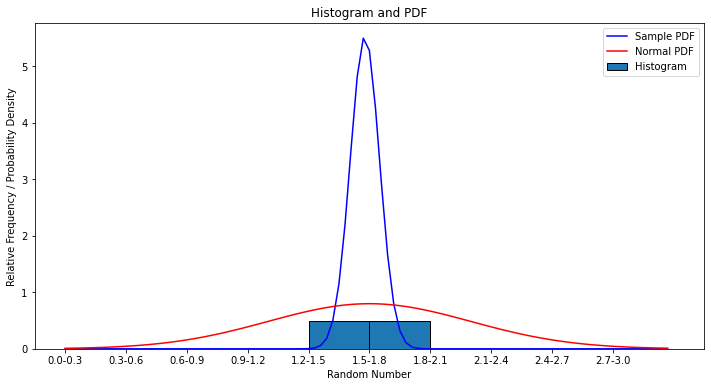

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [1.4, 1.4, 1.705, 1.5250000000000001, 1.6, 1.59, 1.685, 1.5899999999999999, 1.53, 1.6750000000000003, 1.5750000000000002, 1.73, 1.565, 1.35, 1.42, 1.5499999999999998, 1.58, 1.53, 1.5499999999999998, 1.6]
Max_Random_freq is 1.73
Min_Random_freq is 1.35

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.5575000000000006

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.010653947368418801

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.10321796049340833

Relative Error for Mathematical Expectation: 3.83333333333337%
Relative Error for Standard Deviation: 79.35640790131833%
Relative Error for Variance: 95.73842105263249%



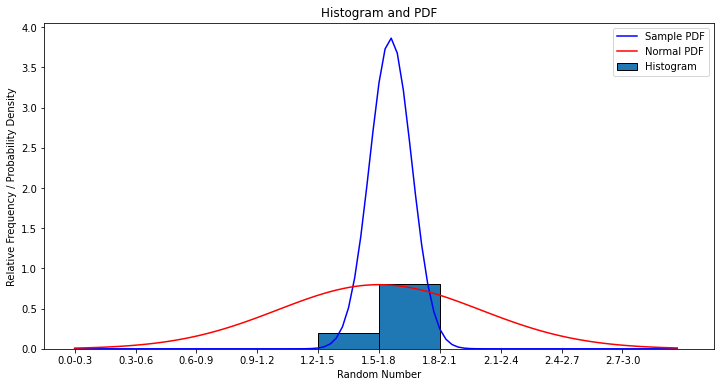

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [1.595, 1.645, 1.46, 1.475, 1.455, 1.6600000000000001, 1.495, 1.545, 1.495, 1.44, 1.425, 1.555, 1.42, 1.69, 1.58, 1.625, 1.6149999999999998, 1.455, 1.57, 1.4, 1.44, 1.475, 1.65, 1.585, 1.4849999999999999, 1.6150000000000002, 1.365, 1.205, 1.6549999999999998, 1.5, 1.59, 1.56, 1.4649999999999999, 1.6149999999999998, 1.665, 1.5550000000000002, 1.5150000000000001, 1.505, 1.435, 1.4649999999999999, 1.5550000000000002, 1.5750000000000002, 1.6400000000000001, 1.435, 1.6600000000000001, 1.46, 1.41, 1.5150000000000001, 1.45, 1.55]
Max_Random_freq is 1.69
Min_Random_freq is 1.205

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.5239000000000003

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.009226826530612254

Th

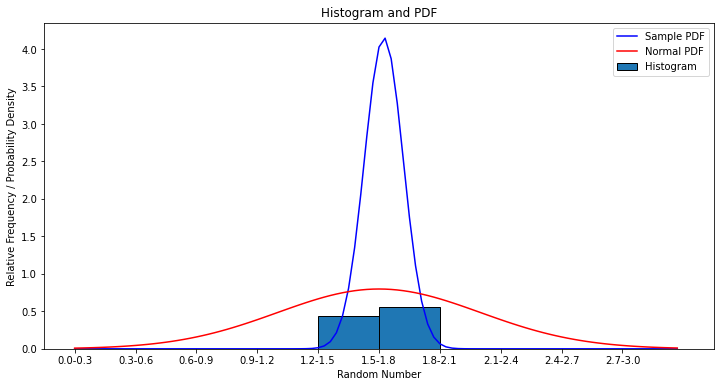

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [1.4249999999999998, 1.69, 1.4, 1.495, 1.415, 1.335, 1.5150000000000001, 1.5550000000000002, 1.4449999999999998, 1.3599999999999999, 1.375, 1.495, 1.6099999999999999, 1.415, 1.505, 1.3900000000000001, 1.595, 1.56, 1.605, 1.49, 1.4449999999999998, 1.615, 1.45, 1.6549999999999998, 1.5650000000000002, 1.61, 1.475, 1.6, 1.6150000000000002, 1.475, 1.5150000000000001, 1.69, 1.435, 1.275, 1.5099999999999998, 1.565, 1.505, 1.44, 1.75, 1.4049999999999998, 1.275, 1.56, 1.315, 1.625, 1.605, 1.475, 1.53, 1.68, 1.4049999999999998, 1.465, 1.49, 1.5550000000000002, 1.4449999999999998, 1.375, 1.635, 1.55, 1.475, 1.51, 1.525, 1.48, 1.495, 1.6149999999999998, 1.73, 1.4500000000000002, 1.515, 1.495, 1.6800000000000002, 1.685, 1.62, 1.81, 1.495, 1.68, 1.495, 1.53

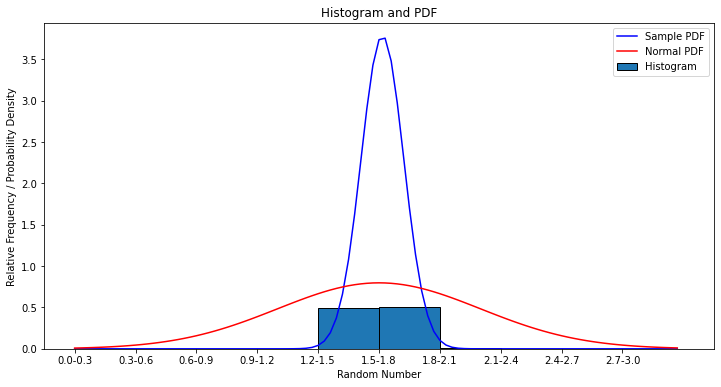

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [1.525, 1.41, 1.615, 1.63, 1.4849999999999999, 1.655, 1.635, 1.65, 1.6949999999999998, 1.465, 1.3900000000000001, 1.53, 1.66, 1.5350000000000001, 1.455, 1.4449999999999998, 1.74, 1.6350000000000002, 1.59, 1.4200000000000002, 1.5350000000000001, 1.5450000000000002, 1.37, 1.4700000000000002, 1.495, 1.455, 1.52, 1.56, 1.48, 1.4849999999999999, 1.44, 1.75, 1.55, 1.62, 1.375, 1.5, 1.665, 1.495, 1.435, 1.5150000000000001, 1.54, 1.5950000000000002, 1.42, 1.35, 1.53, 1.63, 1.365, 1.63, 1.685, 1.44, 1.375, 1.38, 1.395, 1.6349999999999998, 1.5150000000000001, 1.44, 1.48, 1.52, 1.58, 1.45, 1.545, 1.61, 1.3199999999999998, 1.495, 1.435, 1.52, 1.605, 1.35, 1.43, 1.58, 1.44, 1.6050000000000002, 1.56, 1.49, 1.525, 1.66, 1.5150000000000001, 1.31, 1.585, 1.605

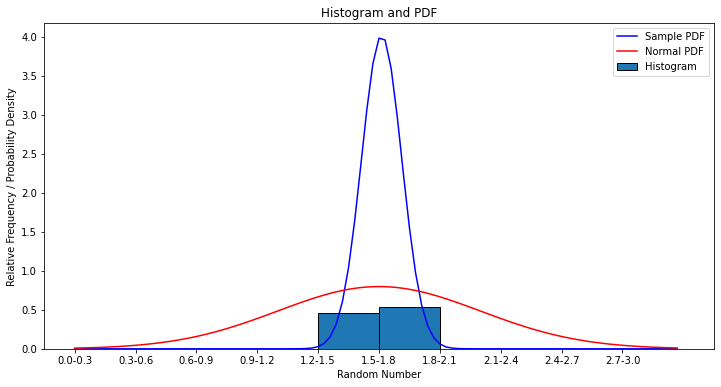

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [1.585, 1.5150000000000001, 1.635, 1.545, 1.63, 1.5699999999999998, 1.6350000000000002, 1.54, 1.5750000000000002, 1.3900000000000001, 1.6, 1.67, 1.57, 1.705, 1.41, 1.55, 1.4300000000000002, 1.5499999999999998, 1.53, 1.54, 1.6500000000000001, 1.51, 1.4899999999999998, 1.595, 1.375, 1.59, 1.53, 1.525, 1.445, 1.605, 1.5150000000000001, 1.49, 1.525, 1.6149999999999998, 1.7000000000000002, 1.35, 1.625, 1.5150000000000001, 1.5250000000000001, 1.595, 1.43, 1.55, 1.625, 1.475, 1.41, 1.56, 1.505, 1.7349999999999999, 1.72, 1.46, 1.585, 1.3450000000000002, 1.505, 1.475, 1.5750000000000002, 1.53, 1.69, 1.42, 1.47, 1.365, 1.435, 1.48, 1.59, 1.495, 1.475, 1.4649999999999999, 1.6549999999999998, 1.495, 1.52, 1.4000000000000001, 1.4949999999999999, 1.395, 1.7

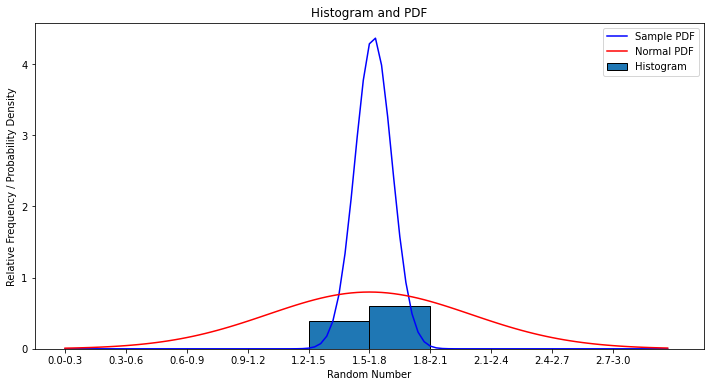

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [1.55, 1.495, 1.55, 1.665, 1.425, 1.525, 1.565, 1.6300000000000001, 1.545, 1.78, 1.71, 1.57, 1.46, 1.375, 1.45, 1.48, 1.74, 1.57, 1.5950000000000002, 1.4649999999999999, 1.4249999999999998, 1.475, 1.3050000000000002, 1.51, 1.5350000000000001, 1.56, 1.5550000000000002, 1.65, 1.59, 1.355, 1.5799999999999998, 1.5350000000000001, 1.5350000000000001, 1.455, 1.6300000000000001, 1.56, 1.5699999999999998, 1.4300000000000002, 1.3900000000000001, 1.51, 1.425, 1.58, 1.35, 1.48, 1.515, 1.53, 1.405, 1.4, 1.615, 1.395, 1.795, 1.7249999999999999, 1.6149999999999998, 1.435, 1.455, 1.565, 1.565, 1.51, 1.525, 1.48, 1.625, 1.52, 1.46, 1.625, 1.6500000000000001, 1.575, 1.475, 1.475, 1.6300000000000001, 1.49, 1.5, 1.5950000000000002, 1.66, 1.44, 1.73, 1.46, 1.625

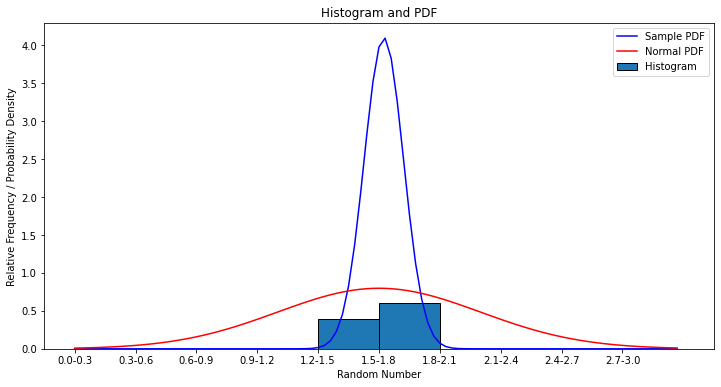

In [12]:
n1 = 50
n2 = 100
n3 = 200
p = 0.5

rf1 = 1
rf2 = 1
rf3 = 1

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_frequencies = []

    for _ in range(n):
        # Generate random numbers 
        random_freq = sum_frequencies(n1, n2, n3, p)
        random_frequencies.append(random_freq)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, rf2, rf3, random_frequencies)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 3  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
    

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

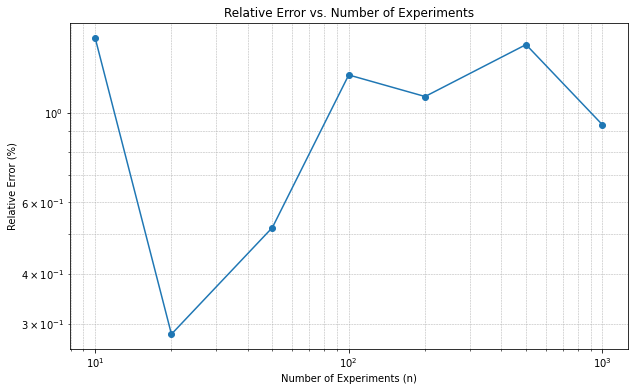

In [119]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

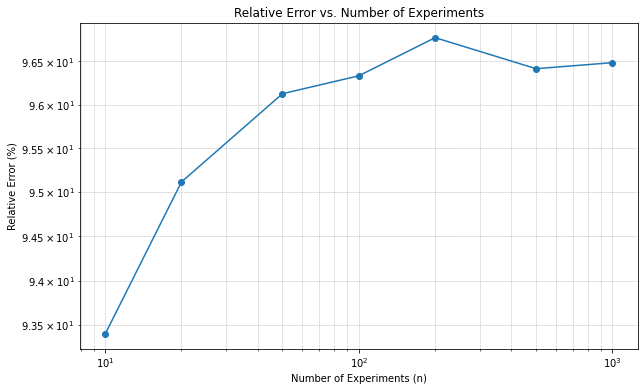

In [120]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

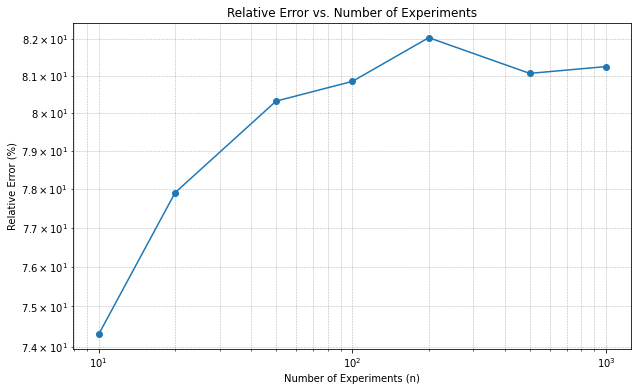

In [121]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [122]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
